In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [61]:
df =pd.read_json("D:/Advanced_training/Advanced-training-Python-AIML/Day-8/file.json")

In [62]:
df.shape

(5, 13)

In [63]:
df.groupby('productName')['price'].sum()

productName
4K Ultra HD Smart TV    799.99
Bluetooth Speaker        59.99
Smartphone Case          29.99
Winter Jacket           129.99
Wireless Headphones     199.99
Name: price, dtype: float64

In [64]:
df.groupby('category')['price'].sum()

category
Accessories      29.99
Clothing        129.99
Electronics    1059.97
Name: price, dtype: float64

In [65]:
df

,productId,productName,description,brand,category,price,currency,stock,images,variants,dimensions,ratings,reviews
0,1001,Wireless Headphones,Noise-cancelling wireless headphones with Blue...,SoundPro,Electronics,199.99,USD,"{'available': True, 'quantity': 50}","[https://example.com/products/1001/main.jpg, h...","[{'variantId': '1001_01', 'color': 'Black', 'p...","{'weight': '0.5kg', 'width': '18cm', 'height':...","{'averageRating': 4.7, 'numberOfReviews': 120}","[{'reviewId': 501, 'userId': 101, 'username': ..."
1,1002,Smartphone Case,"Durable and shockproof case for smartphones, a...",CaseMate,Accessories,29.99,USD,"{'available': True, 'quantity': 200}","[https://example.com/products/1002/main.jpg, h...","[{'variantId': '1002_01', 'color': 'Black', 'p...","{'weight': '0.2kg', 'width': '8cm', 'height': ...","{'averageRating': 4.4, 'numberOfReviews': 80}","[{'reviewId': 601, 'userId': 103, 'username': ..."
2,1003,4K Ultra HD Smart TV,55-inch 4K Ultra HD Smart TV with built-in Wi-...,Visionary,Electronics,799.99,USD,"{'available': True, 'quantity': 30}","[https://example.com/products/1003/main.jpg, h...","[{'variantId': '1003_01', 'screenSize': '55 in...","{'weight': '15kg', 'width': '123cm', 'height':...","{'averageRating': 4.8, 'numberOfReviews': 250}","[{'reviewId': 701, 'userId': 105, 'username': ..."
3,1004,Bluetooth Speaker,Portable Bluetooth speaker with 12-hour batter...,AudioX,Electronics,59.99,USD,"{'available': True, 'quantity': 100}","[https://example.com/products/1004/main.jpg, h...","[{'variantId': '1004_01', 'color': 'Red', 'pri...","{'weight': '0.3kg', 'width': '15cm', 'height':...","{'averageRating': 4.6, 'numberOfReviews': 150}","[{'reviewId': 801, 'userId': 107, 'username': ..."
4,1005,Winter Jacket,Men's water-resistant winter jacket with a fur...,ColdTech,Clothing,129.99,USD,"{'available': True, 'quantity': 80}","[https://example.com/products/1005/main.jpg, h...","[{'variantId': '1005_01', 'size': 'M', 'color'...","{'weight': '1.5kg', 'width': '60cm', 'height':...","{'averageRating': 4.5, 'numberOfReviews': 60}","[{'reviewId': 901, 'userId': 109, 'username': ..."


In [70]:
for i in df['dimensions']:
    for j in i:
        df[j]=i[j]
df.drop('dimensions',axis=1,inplace=True)

In [71]:
df['category'].value_counts()

category
Electronics    3
Accessories    1
Clothing       1
Name: count, dtype: int64

In [72]:
df.groupby('productName')['price'].sum()

productName
4K Ultra HD Smart TV    799.99
Bluetooth Speaker        59.99
Smartphone Case          29.99
Winter Jacket           129.99
Wireless Headphones     199.99
Name: price, dtype: float64

In [73]:
df.describe()

,productId,price
count,5.000000,5.000000
mean,1003.000000,243.990000
std,1.581139,317.694822
min,1001.000000,29.990000
25%,1002.000000,59.990000
50%,1003.000000,129.990000
75%,1004.000000,199.990000
max,1005.000000,799.990000


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   productId    5 non-null      int64  
 1   productName  5 non-null      object 
 2   description  5 non-null      object 
 3   brand        5 non-null      object 
 4   category     5 non-null      object 
 5   price        5 non-null      float64
 6   currency     5 non-null      object 
 7   stock        5 non-null      object 
 8   images       5 non-null      object 
 9   variants     5 non-null      object 
 10  ratings      5 non-null      object 
 11  reviews      5 non-null      object 
 12  weight       5 non-null      object 
 13  width        5 non-null      object 
 14  height       5 non-null      object 
 15  depth        5 non-null      object 
dtypes: float64(1), int64(1), object(14)
memory usage: 772.0+ bytes


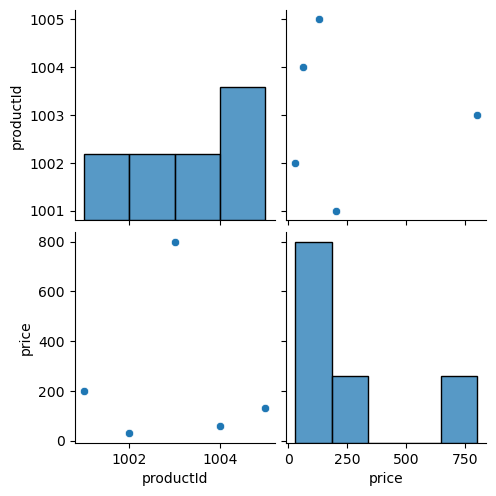

In [75]:
sns.pairplot(df)

In [76]:
df['ratings']

0    {'averageRating': 4.7, 'numberOfReviews': 120}
1     {'averageRating': 4.4, 'numberOfReviews': 80}
2    {'averageRating': 4.8, 'numberOfReviews': 250}
3    {'averageRating': 4.6, 'numberOfReviews': 150}
4     {'averageRating': 4.5, 'numberOfReviews': 60}
Name: ratings, dtype: object

In [77]:
averageRating=[]
numberOfReviews=[]
x=dict(df['ratings'])
for i in range(df.shape[0]):
    averageRating.append(x[i]['averageRating'])
    numberOfReviews.append(x[i]['numberOfReviews'])
    
df['numberOfReviews']=numberOfReviews
df['averageRating'] = averageRating
df.drop('ratings',axis=1,inplace=True)   

In [78]:
available=[]
quantity=[]
x=dict(df['stock'])
for i in range(df.shape[0]):
    available.append(x[i]['available'])
    quantity.append(x[i]['quantity'])
    
df['available']=available
df['quantity'] = quantity
df.drop('stock',axis=1,inplace=True)

In [80]:
for i in df['reviews']:
    for j in i:
        print(j)
        

{'reviewId': 501, 'userId': 101, 'username': 'techguy123', 'rating': 5, 'comment': 'Amazing sound quality and battery life!'}
{'reviewId': 502, 'userId': 102, 'username': 'jane_doe', 'rating': 4, 'comment': 'Great headphones but a bit pricey.'}
{'reviewId': 601, 'userId': 103, 'username': 'caseuser456', 'rating': 4, 'comment': 'Very sturdy and fits perfectly.'}
{'reviewId': 602, 'userId': 104, 'username': 'mobile_fan', 'rating': 5, 'comment': "Best case I've bought for my phone!"}
{'reviewId': 701, 'userId': 105, 'username': 'techlover123', 'rating': 5, 'comment': 'Incredible picture quality, streaming works seamlessly.'}
{'reviewId': 702, 'userId': 106, 'username': 'homecinema', 'rating': 4, 'comment': 'Great TV, but a little bulky.'}
{'reviewId': 801, 'userId': 107, 'username': 'musicfan23', 'rating': 5, 'comment': 'Excellent sound quality for its size!'}
{'reviewId': 802, 'userId': 108, 'username': 'outdoor_lover', 'rating': 4, 'comment': 'Great for outdoor use, but the battery coul

In [81]:
df

,productId,productName,description,brand,category,price,currency,images,variants,reviews,weight,width,height,depth,numberOfReviews,averageRating,available,quantity
0,1001,Wireless Headphones,Noise-cancelling wireless headphones with Blue...,SoundPro,Electronics,199.99,USD,"[https://example.com/products/1001/main.jpg, h...","[{'variantId': '1001_01', 'color': 'Black', 'p...","[{'reviewId': 501, 'userId': 101, 'username': ...",1.5kg,60cm,85cm,5cm,120,4.7,True,50
1,1002,Smartphone Case,"Durable and shockproof case for smartphones, a...",CaseMate,Accessories,29.99,USD,"[https://example.com/products/1002/main.jpg, h...","[{'variantId': '1002_01', 'color': 'Black', 'p...","[{'reviewId': 601, 'userId': 103, 'username': ...",1.5kg,60cm,85cm,5cm,80,4.4,True,200
2,1003,4K Ultra HD Smart TV,55-inch 4K Ultra HD Smart TV with built-in Wi-...,Visionary,Electronics,799.99,USD,"[https://example.com/products/1003/main.jpg, h...","[{'variantId': '1003_01', 'screenSize': '55 in...","[{'reviewId': 701, 'userId': 105, 'username': ...",1.5kg,60cm,85cm,5cm,250,4.8,True,30
3,1004,Bluetooth Speaker,Portable Bluetooth speaker with 12-hour batter...,AudioX,Electronics,59.99,USD,"[https://example.com/products/1004/main.jpg, h...","[{'variantId': '1004_01', 'color': 'Red', 'pri...","[{'reviewId': 801, 'userId': 107, 'username': ...",1.5kg,60cm,85cm,5cm,150,4.6,True,100
4,1005,Winter Jacket,Men's water-resistant winter jacket with a fur...,ColdTech,Clothing,129.99,USD,"[https://example.com/products/1005/main.jpg, h...","[{'variantId': '1005_01', 'size': 'M', 'color'...","[{'reviewId': 901, 'userId': 109, 'username': ...",1.5kg,60cm,85cm,5cm,60,4.5,True,80


In [82]:
import json

In [84]:
data1 = json.load(open("D:/Advanced_training/Advanced-training-Python-AIML/Day-8/file.json"))

In [85]:
df1 = pd.json_normalize(data1)

In [86]:
df1.head()

,productId,productName,description,brand,category,price,currency,images,variants,reviews,stock.available,stock.quantity,dimensions.weight,dimensions.width,dimensions.height,dimensions.depth,ratings.averageRating,ratings.numberOfReviews
0,1001,Wireless Headphones,Noise-cancelling wireless headphones with Blue...,SoundPro,Electronics,199.99,USD,"[https://example.com/products/1001/main.jpg, h...","[{'variantId': '1001_01', 'color': 'Black', 'p...","[{'reviewId': 501, 'userId': 101, 'username': ...",True,50,0.5kg,18cm,20cm,8cm,4.7,120
1,1002,Smartphone Case,"Durable and shockproof case for smartphones, a...",CaseMate,Accessories,29.99,USD,"[https://example.com/products/1002/main.jpg, h...","[{'variantId': '1002_01', 'color': 'Black', 'p...","[{'reviewId': 601, 'userId': 103, 'username': ...",True,200,0.2kg,8cm,15cm,1cm,4.4,80
2,1003,4K Ultra HD Smart TV,55-inch 4K Ultra HD Smart TV with built-in Wi-...,Visionary,Electronics,799.99,USD,"[https://example.com/products/1003/main.jpg, h...","[{'variantId': '1003_01', 'screenSize': '55 in...","[{'reviewId': 701, 'userId': 105, 'username': ...",True,30,15kg,123cm,80cm,10cm,4.8,250
3,1004,Bluetooth Speaker,Portable Bluetooth speaker with 12-hour batter...,AudioX,Electronics,59.99,USD,"[https://example.com/products/1004/main.jpg, h...","[{'variantId': '1004_01', 'color': 'Red', 'pri...","[{'reviewId': 801, 'userId': 107, 'username': ...",True,100,0.3kg,15cm,8cm,5cm,4.6,150
4,1005,Winter Jacket,Men's water-resistant winter jacket with a fur...,ColdTech,Clothing,129.99,USD,"[https://example.com/products/1005/main.jpg, h...","[{'variantId': '1005_01', 'size': 'M', 'color'...","[{'reviewId': 901, 'userId': 109, 'username': ...",True,80,1.5kg,60cm,85cm,5cm,4.5,60


In [87]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   productId                5 non-null      int64  
 1   productName              5 non-null      object 
 2   description              5 non-null      object 
 3   brand                    5 non-null      object 
 4   category                 5 non-null      object 
 5   price                    5 non-null      float64
 6   currency                 5 non-null      object 
 7   images                   5 non-null      object 
 8   variants                 5 non-null      object 
 9   reviews                  5 non-null      object 
 10  stock.available          5 non-null      bool   
 11  stock.quantity           5 non-null      int64  
 12  dimensions.weight        5 non-null      object 
 13  dimensions.width         5 non-null      object 
 14  dimensions.height        5 non

In [90]:
import re

columns_to_clean = ['dimensions.weight','dimensions.width','dimensions.height','dimensions.depth']
for col in columns_to_clean:
    df1[col] = df1[col].astype(str).str.replace(r'[^\d.]','',regex=True)
    df1[col] = pd.to_numeric(df1[col],errors='coerce')

In [91]:
df1

,productId,productName,description,brand,category,price,currency,images,variants,reviews,stock.available,stock.quantity,dimensions.weight,dimensions.width,dimensions.height,dimensions.depth,ratings.averageRating,ratings.numberOfReviews
0,1001,Wireless Headphones,Noise-cancelling wireless headphones with Blue...,SoundPro,Electronics,199.99,USD,"[https://example.com/products/1001/main.jpg, h...","[{'variantId': '1001_01', 'color': 'Black', 'p...","[{'reviewId': 501, 'userId': 101, 'username': ...",True,50,0.5,18,20,8,4.7,120
1,1002,Smartphone Case,"Durable and shockproof case for smartphones, a...",CaseMate,Accessories,29.99,USD,"[https://example.com/products/1002/main.jpg, h...","[{'variantId': '1002_01', 'color': 'Black', 'p...","[{'reviewId': 601, 'userId': 103, 'username': ...",True,200,0.2,8,15,1,4.4,80
2,1003,4K Ultra HD Smart TV,55-inch 4K Ultra HD Smart TV with built-in Wi-...,Visionary,Electronics,799.99,USD,"[https://example.com/products/1003/main.jpg, h...","[{'variantId': '1003_01', 'screenSize': '55 in...","[{'reviewId': 701, 'userId': 105, 'username': ...",True,30,15.0,123,80,10,4.8,250
3,1004,Bluetooth Speaker,Portable Bluetooth speaker with 12-hour batter...,AudioX,Electronics,59.99,USD,"[https://example.com/products/1004/main.jpg, h...","[{'variantId': '1004_01', 'color': 'Red', 'pri...","[{'reviewId': 801, 'userId': 107, 'username': ...",True,100,0.3,15,8,5,4.6,150
4,1005,Winter Jacket,Men's water-resistant winter jacket with a fur...,ColdTech,Clothing,129.99,USD,"[https://example.com/products/1005/main.jpg, h...","[{'variantId': '1005_01', 'size': 'M', 'color'...","[{'reviewId': 901, 'userId': 109, 'username': ...",True,80,1.5,60,85,5,4.5,60


In [99]:
img_col = df1['images']
num_img = []
for i in img_col:
    print(i)
    num_img.append(len(i))
df1['num_img'] = num_img
    

['https://example.com/products/1001/main.jpg', 'https://example.com/products/1001/side.jpg']
['https://example.com/products/1002/main.jpg', 'https://example.com/products/1002/back.jpg']
['https://example.com/products/1003/main.jpg', 'https://example.com/products/1003/side.jpg']
['https://example.com/products/1004/main.jpg', 'https://example.com/products/1004/side.jpg']
['https://example.com/products/1005/main.jpg', 'https://example.com/products/1005/back.jpg']


In [106]:
df1['num_variants'] = df1['variants'].apply(lambda x:len(x) if isinstance(x,list) else 0)

In [107]:
df1['num_reviews'] =  df1['reviews'].apply(lambda x:len(x) if isinstance(x,list) else 0)

In [108]:
df1

,productId,productName,description,brand,category,price,currency,images,variants,reviews,...,stock.quantity,dimensions.weight,dimensions.width,dimensions.height,dimensions.depth,ratings.averageRating,ratings.numberOfReviews,num_img,num_variants,num_reviews
0,1001,Wireless Headphones,Noise-cancelling wireless headphones with Blue...,SoundPro,Electronics,199.99,USD,"[https://example.com/products/1001/main.jpg, h...","[{'variantId': '1001_01', 'color': 'Black', 'p...","[{'reviewId': 501, 'userId': 101, 'username': ...",...,50,0.5,18,20,8,4.7,120,2,2,2
1,1002,Smartphone Case,"Durable and shockproof case for smartphones, a...",CaseMate,Accessories,29.99,USD,"[https://example.com/products/1002/main.jpg, h...","[{'variantId': '1002_01', 'color': 'Black', 'p...","[{'reviewId': 601, 'userId': 103, 'username': ...",...,200,0.2,8,15,1,4.4,80,2,2,2
2,1003,4K Ultra HD Smart TV,55-inch 4K Ultra HD Smart TV with built-in Wi-...,Visionary,Electronics,799.99,USD,"[https://example.com/products/1003/main.jpg, h...","[{'variantId': '1003_01', 'screenSize': '55 in...","[{'reviewId': 701, 'userId': 105, 'username': ...",...,30,15.0,123,80,10,4.8,250,2,1,2
3,1004,Bluetooth Speaker,Portable Bluetooth speaker with 12-hour batter...,AudioX,Electronics,59.99,USD,"[https://example.com/products/1004/main.jpg, h...","[{'variantId': '1004_01', 'color': 'Red', 'pri...","[{'reviewId': 801, 'userId': 107, 'username': ...",...,100,0.3,15,8,5,4.6,150,2,2,2
4,1005,Winter Jacket,Men's water-resistant winter jacket with a fur...,ColdTech,Clothing,129.99,USD,"[https://example.com/products/1005/main.jpg, h...","[{'variantId': '1005_01', 'size': 'M', 'color'...","[{'reviewId': 901, 'userId': 109, 'username': ...",...,80,1.5,60,85,5,4.5,60,2,2,2


## XML file

In [109]:
import xml

In [122]:
df = pd.read_xml('D:/Advanced_training/Advanced-training-Python-AIML/Day-8/basic_xml.xml')

In [123]:
df

,name,age,city
0,John,30,New York
1,Anna,25,Paris


In [124]:
"D:\Advanced_training\Advanced-training-Python-AIML\Day-8\complex_xml_structures.xml"

'D:\\Advanced_training\\Advanced-training-Python-AIML\\Day-8\\complex_xml_structures.xml'

In [126]:
df1 = pd.read_xml('D:/Advanced_training/Advanced-training-Python-AIML/Day-8/complex_xml_structures.xml',xpath='.//person')

In [127]:
df1

,name,age
0,John,30
1,Anna,25


In [140]:
namespaces = {'ns':'http://www.example.com'}
dataframe = pd.read_xml('D:/Advanced_training/Advanced-training-Python-AIML/Day-8/xml_namespace.xml',namespaces=namespaces,xpath='.//ns:city')

In [141]:
dataframe

,name,person
0,New York,NaN


In [150]:
df = pd.DataFrame({
'last_names' : ['Connor','Connor','Reese','Bonnot'],
'first_names' : ['Sarah','john','kyle','joe'],
})
df[df.last_names.str.match('onnor')]

,last_names,first_names


In [151]:
foo = 'Connor'
df.query('last_names==@foo')

,last_names,first_names
0,Connor,Sarah
1,Connor,john


In [152]:
column_name = 'first_names'
df.query(f"{column_name}=='john'")

,last_names,first_names
1,Connor,john


In [158]:
df = pd.DataFrame({
    'Year' : [2016,2015,2014,2013,2012],
    'Top Animal' : ['Giant panda','Chicken','Pig','Turkey','Dog']
})

df.rename(columns={'Year': 'Calendar Year', 'Top Animal': 'Animal'})

,Calendar Year,Animal
0,2016,Giant panda
1,2015,Chicken
2,2014,Pig
3,2013,Turkey
4,2012,Dog


In [159]:
import pandas as pd
df = pd.DataFrame({
  'time': ['2022-09-14 00:52:00-07:00', '2022-09-14 00:52:30-07:00',
           '2022-09-14 01:52:30-07:00'],
  'letter': ['A', 'B', 'C'],
})
df['time'] = pd.to_datetime(df.time)
 
df.query('time >= "2022-09-14 00:52:30-07:00"')

,time,letter
1,2022-09-14 00:52:30-07:00,B
2,2022-09-14 01:52:30-07:00,C


In [167]:
begin_ts = '2022-09-14 00:52:00-07:00'
end_ts = '2022-09-14 00:54:00-07:00'

df.query('@begin_ts<=time<@end_ts')

,time,letter
0,2022-09-14 00:52:00-07:00,A
1,2022-09-14 00:52:30-07:00,B


In [168]:
df.set_index('time',inplace=True)
df.loc['2022-09-14':'2022-09-14 00:53']

,letter
time,
2022-09-14 00:52:00-07:00,A
2022-09-14 00:52:30-07:00,B


In [172]:
def rows_in_time_range(df, time_column, start_ts_str, timedelta_str):
    start_ts = pd.Timestamp(start_ts_str).tz_localize('US/Pacific')
    end_ts = start_ts + pd.to_timedelta(timedelta_str)
    return df.query("@start_ts <= {0} < @end_ts".format(time_column))

rows_in_time_range(df, 'time', '2022-09-14 00:00', '52 minutes 31 seconds')

,letter
time,
2022-09-14 00:52:00-07:00,A
2022-09-14 00:52:30-07:00,B


In [178]:
import pandas as pd
df = pd.DataFrame({
  'date': ['2022-09-14', '2022-09-15', '2022-09-16'],
  'letter': ['A', 'B', 'C'],
  'dict' : [{ 'fruit': 'apple', 'weather': 'aces'},
            { 'fruit': 'banana', 'weather': 'bad'},
            { 'fruit': 'cantaloupe', 'weather': 'cloudy'}],
})
print(df)
pd.concat([df.drop(['dict'], axis=1), df['dict'].apply(pd.Series)], axis=1)
df

         date letter                                          dict
0  2022-09-14      A         {'fruit': 'apple', 'weather': 'aces'}
1  2022-09-15      B         {'fruit': 'banana', 'weather': 'bad'}
2  2022-09-16      C  {'fruit': 'cantaloupe', 'weather': 'cloudy'}


,date,letter,dict
0,2022-09-14,A,"{'fruit': 'apple', 'weather': 'aces'}"
1,2022-09-15,B,"{'fruit': 'banana', 'weather': 'bad'}"
2,2022-09-16,C,"{'fruit': 'cantaloupe', 'weather': 'cloudy'}"


In [179]:
pd.Timestamp('9/27/22').tz_localize('US/Pacific')

Timestamp('2022-09-27 00:00:00-0700', tz='US/Pacific')

In [180]:
pd.to_timedelta(1,unit='h')

Timedelta('0 days 01:00:00')

In [181]:
pd.Timedelta(days=2)

Timedelta('2 days 00:00:00')

In [182]:
pd.Timedelta("2 days 2 hours 15 minutes 30 seconds")

Timedelta('2 days 02:15:30')